# 1. Initializations

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load dataframe

In [3]:

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
#resp1 = await fetch(URL1)
#text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(URL1)

In [4]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
#resp2 = await fetch(URL2)
#text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(URL2)

In [6]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


# Task 1: Create NumPy array

In [7]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

# Task 2: Standardize data in X

In [8]:
# Instantiate standard scaler
transform = preprocessing.StandardScaler()

# Get mean and std to be used for scaling
transform.fit(X)

# Print mean
print(transform.mean_)

# Finally, apply standardization
X = transform.transform(X)

[4.55000000e+01 6.10495941e+03 1.78888889e+00 3.50000000e+00
 1.65555556e+00 1.11111111e-02 1.11111111e-02 3.00000000e-01
 1.11111111e-02 2.33333333e-01 7.77777778e-02 3.33333333e-02
 1.00000000e-01 1.11111111e-02 5.55555556e-02 1.55555556e-01
 6.11111111e-01 2.44444444e-01 1.44444444e-01 1.44444444e-01
 2.22222222e-02 3.88888889e-01 2.22222222e-02 1.33333333e-01
 1.11111111e-02 1.11111111e-02 1.11111111e-02 1.11111111e-02
 1.11111111e-02 1.11111111e-02 1.11111111e-02 1.11111111e-02
 1.11111111e-02 1.11111111e-02 1.11111111e-02 1.11111111e-02
 1.11111111e-02 1.11111111e-02 1.11111111e-02 1.11111111e-02
 1.11111111e-02 1.11111111e-02 1.11111111e-02 2.22222222e-02
 1.11111111e-02 1.11111111e-02 1.11111111e-02 1.11111111e-02
 1.11111111e-02 2.22222222e-02 1.11111111e-02 2.22222222e-02
 2.22222222e-02 1.11111111e-02 2.22222222e-02 2.22222222e-02
 1.11111111e-02 1.11111111e-02 2.22222222e-02 2.22222222e-02
 2.22222222e-02 1.11111111e-02 1.11111111e-02 1.11111111e-02
 2.22222222e-02 4.444444

# Task 3: Train-test split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [10]:
Y_test.shape

(18,)

# Task 4: Logistic regresion grid search

In [11]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [12]:
lr=LogisticRegression()
gridCV = GridSearchCV(estimator = lr,
                        param_grid = parameters,
                        cv = 10,
                        scoring = 'accuracy',
                        verbose = 1)
logreg_cv = gridCV.fit(X_train, Y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


In [13]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


# Task 5:  logReg score

In [14]:
logReg_bestModel = logreg_cv.best_estimator_
modelAccuracy_logReg = logReg_bestModel.score(X_test, Y_test)
print(f"Test set accuracy with best LogReg model: {modelAccuracy_logReg:.4f}")

Test set accuracy with best LogReg model: 0.8333


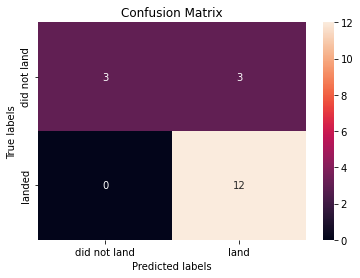

In [15]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# Task 6: SVM

In [16]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [17]:
gridCV = GridSearchCV(estimator = svm,
                        param_grid = parameters,
                        cv = 10,
                        scoring = 'accuracy',
                        verbose = 1)
svm_cv = gridCV.fit(X_train, Y_train)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits


# Task 7: SVM score

In [18]:
svm_bestModel = svm_cv.best_estimator_
modelAccuracy_svm = svm_bestModel.score(X_test, Y_test)
print(f"Test set accuracy with best SVM model: {modelAccuracy_svm:.4f}")

Test set accuracy with best SVM model: 0.8333


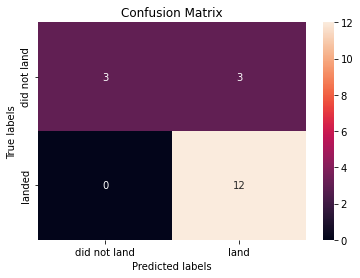

In [19]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# Task 8: Decision tree

In [20]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [21]:
gridCV = GridSearchCV(estimator = tree,
                        param_grid = parameters,
                        cv = 10,
                        scoring = 'accuracy',
                        verbose = 1)
tree_cv = gridCV.fit(X_train, Y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


# Task 9: Decision tree score

In [22]:
tree_bestModel = tree_cv.best_estimator_
modelAccuracy_tree = tree_bestModel.score(X_test, Y_test)
print(f"Test set accuracy with best decision tree model: {modelAccuracy_tree:.4f}")

Test set accuracy with best decision tree model: 0.8333


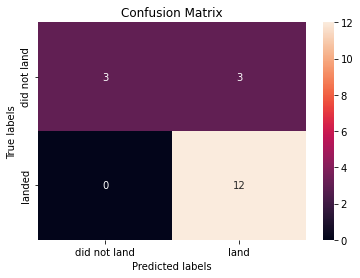

In [23]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# Task 10: KNN 

In [24]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [25]:
gridCV = GridSearchCV(estimator = KNN,
                     param_grid = parameters,
                     cv = 10,
                     scoring = "accuracy",
                     verbose = 1)
knn_cv = gridCV.fit(X_train, Y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


# Task 11: KNN score

In [26]:
knn_bestModel = knn_cv.best_estimator_
modelAccuracy_knn = knn_bestModel.score(X_test, Y_test)
print(f"Test set accuracy with best KNN model: {modelAccuracy_knn:.4f}")

Test set accuracy with best KNN model: 0.8333


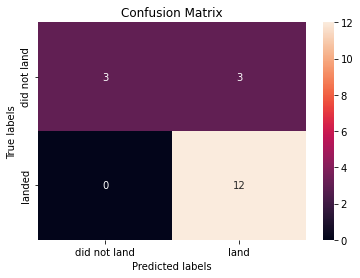

In [27]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

# Task 12: Best performing method

In [28]:
modelAccuracy_all = {"Model": ["logReg", "SVM", "Decision Tree", "KNN"],
                    "Score" : [modelAccuracy_logReg, modelAccuracy_svm, modelAccuracy_tree, modelAccuracy_knn]}
pd.DataFrame(modelAccuracy_all)

,Model,Score
0,logReg,0.833333
1,SVM,0.833333
2,Decision Tree,0.833333
3,KNN,0.833333


# Coursera quiz questions

In [29]:
X_test.shape

(18, 83)

In [30]:
svm_bestModel

SVC(gamma=0.03162277660168379, kernel='sigmoid')

In [31]:
import matplotlib.pyplot as plt

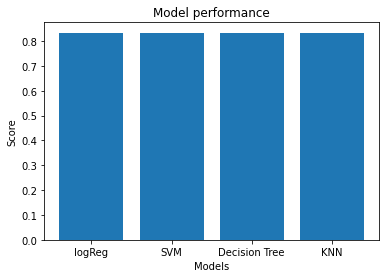

In [32]:
plt.bar(modelAccuracy_all['Model'], modelAccuracy_all['Score'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model performance')

# Display the chart
plt.show()